<a href="https://colab.research.google.com/github/Shyam1805/data-science/blob/master/tuned_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 1.3MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=e14b38a6e6329e038e4e19f9673e4ee82bcda1e6c83e154ce9393921694d54e1
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=c86ab85a813e76225147f0e06741d640f4635b9a6b5341905c621dd50456a13f
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
from tensorflow import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
(train_x,train_label),(test_x,test_label)= keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_x = train_x/255.0
test_x = test_x/255.0

In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
test_x.shape

(10000, 28, 28)

In [ ]:
train_x = train_x.reshape(60000,28,28,1)
test_x = test_x.reshape(10000,28,28,1)

In [ ]:
input_shape = train_x.shape[1:]

In [ ]:
input_shape

(28, 28, 1)

Building The model 


In [ ]:
def tuner_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('filter_1', min_value=32, max_value=128, step=18),
        kernel_size=hp.Choice('kernel_1', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('filter_2', min_value=32, max_value=64, step=18),
        kernel_size=hp.Choice('kernel_2', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1', min_value=32, max_value=128, step=18),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
tuner=RandomSearch(tuner_model,objective='val_accuracy',max_trials=5,directory='output_dir',project_name="Fashion_classfication")

In [ ]:
tuner.search(train_x,train_label,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3930 - accuracy: 0.8568 - val_loss: 0.2979 - val_accuracy: 0.8912
Epoch 2/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2501 - accuracy: 0.9077 - val_loss: 0.2541 - val_accuracy: 0.9078
Epoch 3/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1908 - accuracy: 0.9284 - val_loss: 0.2601 - val_accuracy: 0.9093
Epoch 4/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1408 - accuracy: 0.9471 - val_loss: 0.2732 - val_accuracy: 0.9100
Epoch 5/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1010 - accuracy: 0.9623 - val_loss: 0.2872 - val_accuracy: 0.9080


Epoch 1/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5452 - accuracy: 0.8060 - val_loss: 0.4264 - val_accuracy: 0.8475
Epoch 2/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4073 - accuracy: 0.8529 - val_loss: 0.4961 - val_accuracy: 0.8393
Epoch 3/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3801 - accuracy: 0.8611 - val_loss: 0.3756 - val_accuracy: 0.8640
Epoch 4/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3499 - accuracy: 0.8714 - val_loss: 0.4188 - val_accuracy: 0.8522
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3355 - accuracy: 0.8768 - val_loss: 0.3790 - val_accuracy: 0.8683


Epoch 1/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.4832 - accuracy: 0.8310 - val_loss: 0.3911 - val_accuracy: 0.8594
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3417 - accuracy: 0.8738 - val_loss: 0.3486 - val_accuracy: 0.8751
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3077 - accuracy: 0.8859 - val_loss: 0.3284 - val_accuracy: 0.8832
Epoch 4/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2772 - accuracy: 0.8983 - val_loss: 0.3439 - val_accuracy: 0.8838
Epoch 5/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2499 - accuracy: 0.9061 - val_loss: 0.3855 - val_accuracy: 0.8770


Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4111 - accuracy: 0.8529 - val_loss: 0.3232 - val_accuracy: 0.8817
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2651 - accuracy: 0.9016 - val_loss: 0.2737 - val_accuracy: 0.9003
Epoch 3/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2093 - accuracy: 0.9234 - val_loss: 0.2611 - val_accuracy: 0.9053
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1640 - accuracy: 0.9390 - val_loss: 0.2616 - val_accuracy: 0.9072
Epoch 5/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1238 - accuracy: 0.9536 - val_loss: 0.2823 - val_accuracy: 0.9105


Epoch 1/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.5321 - accuracy: 0.8126 - val_loss: 0.4194 - val_accuracy: 0.8438
Epoch 2/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3871 - accuracy: 0.8579 - val_loss: 0.3872 - val_accuracy: 0.8582
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3543 - accuracy: 0.8671 - val_loss: 0.4358 - val_accuracy: 0.8374
Epoch 4/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3309 - accuracy: 0.8784 - val_loss: 0.4159 - val_accuracy: 0.8470
Epoch 5/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3127 - accuracy: 0.8826 - val_loss: 0.3892 - val_accuracy: 0.8658


INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 50)        500       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        40032     
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 68)                1053252   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                690       
Total params: 1,094,474
Trainable params: 1,094,474
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_x, train_label, epochs=10, validation_split=0.2, initial_epoch=5)

Epoch 6/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0891 - accuracy: 0.9663 - val_loss: 0.3044 - val_accuracy: 0.9122
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0698 - accuracy: 0.9740 - val_loss: 0.3484 - val_accuracy: 0.9150
Epoch 8/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0521 - accuracy: 0.9812 - val_loss: 0.4205 - val_accuracy: 0.9076
Epoch 9/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0384 - accuracy: 0.9859 - val_loss: 0.4409 - val_accuracy: 0.9115
Epoch 10/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0332 - accuracy: 0.9874 - val_loss: 0.4841 - val_accuracy: 0.9111


In [ ]:
predictions = model.predict_classes(test_x)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_label,predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.87      0.85      1000
           3       0.92      0.90      0.91      1000
           4       0.84      0.89      0.86      1000
           5       0.97      0.97      0.97      1000
           6       0.77      0.75      0.76      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**Below is the classes with their fashion items**


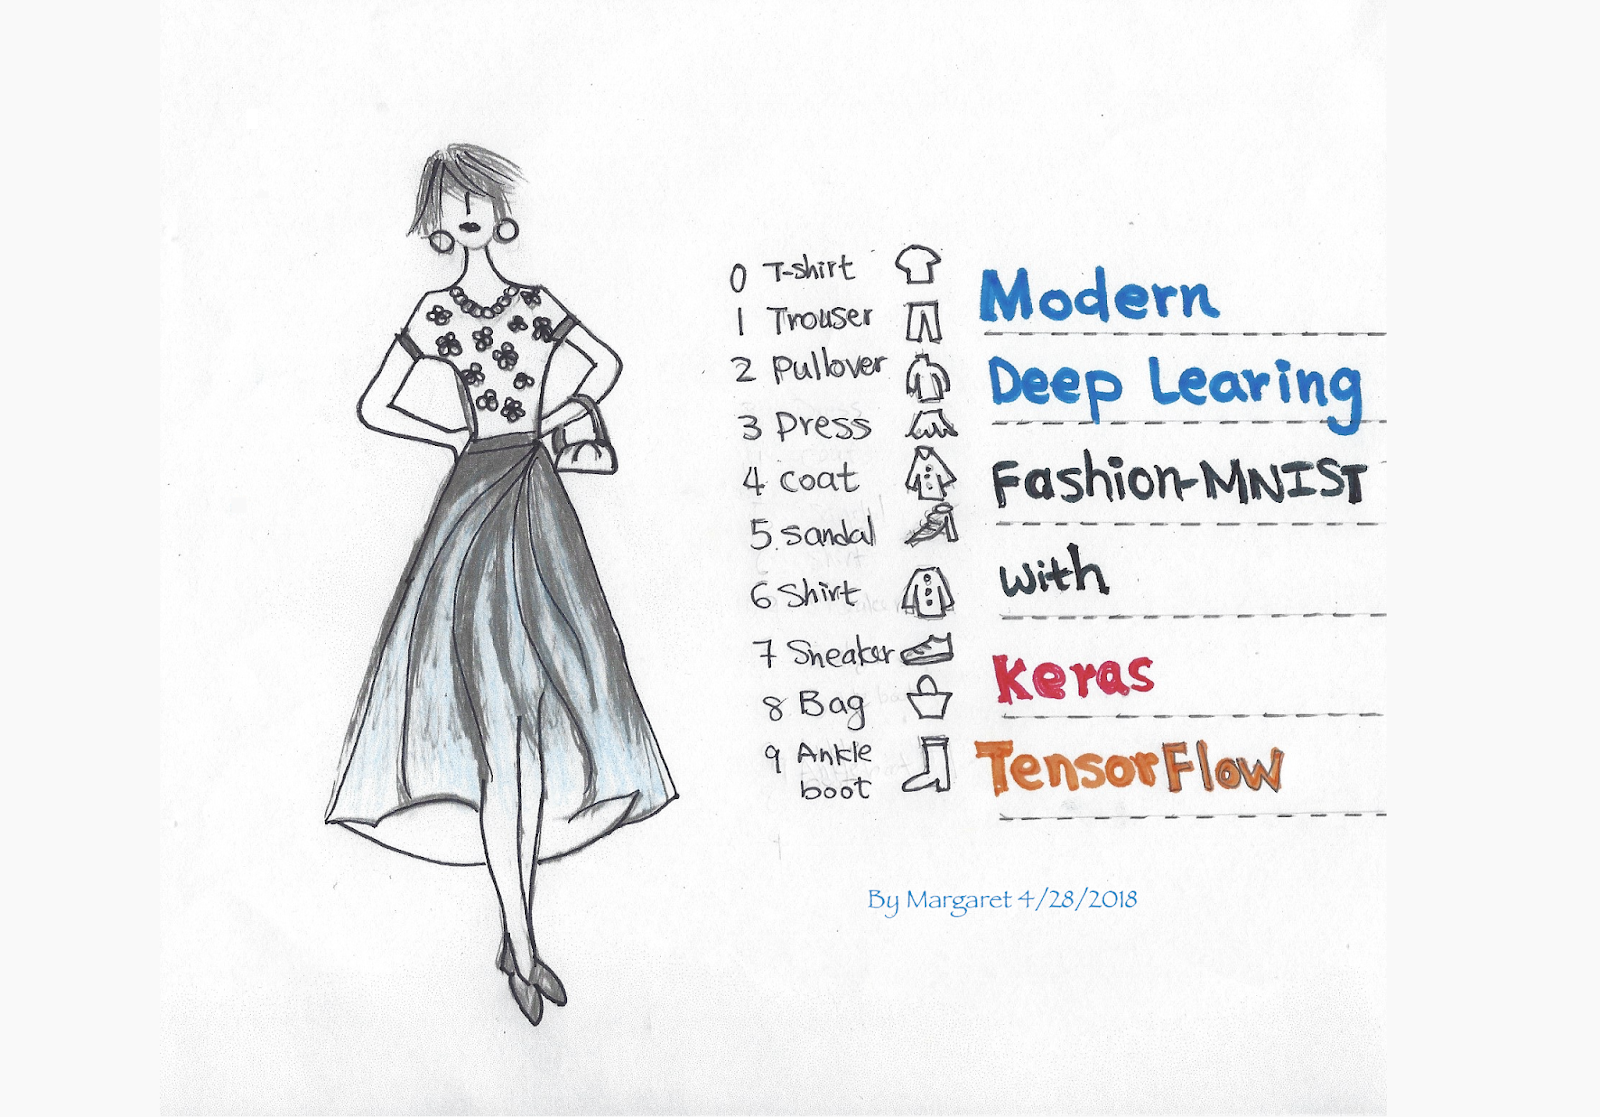

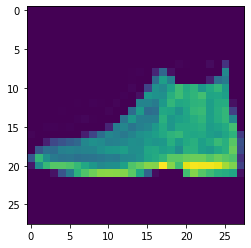

In [ ]:
fashion_sample = test_x[0]
plt.imshow(fashion_sample.reshape(28,28))

In [36]:
model.predict_classes(fashion_sample.reshape(1,28,28,1))

array([9])